<a href="https://colab.research.google.com/github/muqadas007-jerry/Predict-Employee-Attrition-/blob/main/2nd_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")


df.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [33]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

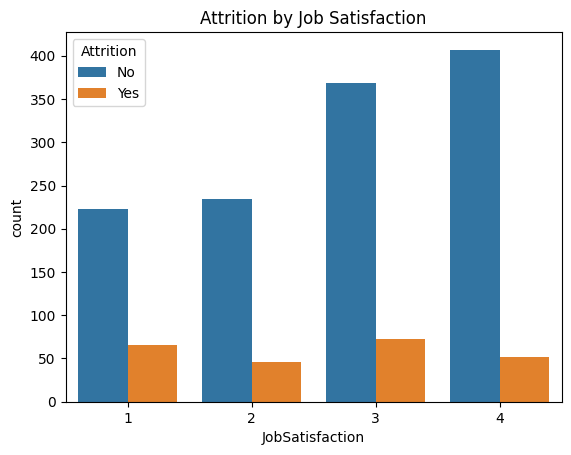

In [34]:
df.info()
df.describe()
df['Attrition'].value_counts()


sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("Attrition by Job Satisfaction")
plt.show()

In [36]:
# Convert columns with 'Yes'/'No' values to numerical representations (0 and 1)
for column in df.select_dtypes(include=['object']).columns:
    if df[column].isin(['Yes', 'No']).all():
        df[column] = df[column].map({'Yes': 1, 'No': 0})



In [37]:
# Calculate the correlation matrix only on numerical columns
numerical_df = df.select_dtypes(include=np.number)
corr_matrix = numerical_df.corr()



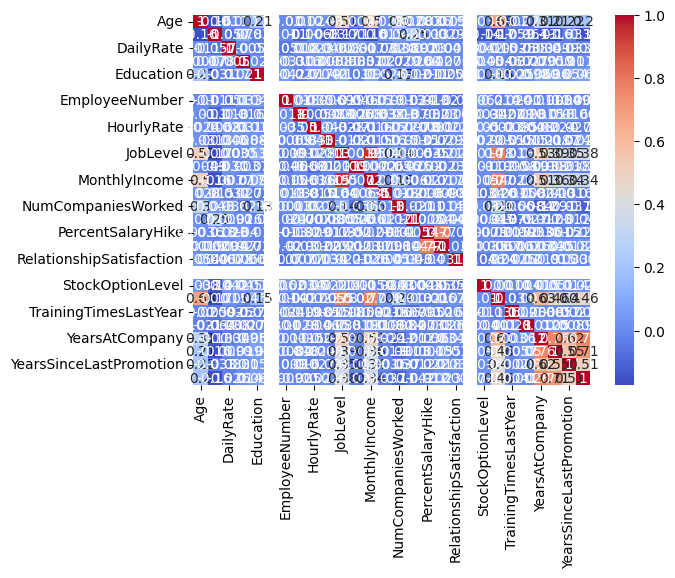

In [38]:
# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

# Convert categorical columns
df = pd.get_dummies(df, drop_first=True)



from sklearn.model_selection import train_test_split
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000)

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

print("Random Forest:\n", classification_report(y_test, rf.predict(X_test)))
print("Logistic Regression:\n", classification_report(y_test, lr.predict(X_test)))

Random Forest:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.50      0.18      0.26        39

    accuracy                           0.87       294
   macro avg       0.69      0.58      0.60       294
weighted avg       0.83      0.87      0.84       294



In [43]:
from sklearn.metrics import classification_report

# Predictions and evaluation
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [48]:
# !pip install shap

# 2. Import required libraries
import shap
import matplotlib.pyplot as plt

# 3. Create a SHAP explainer for the trained Random Forest model
explainer = shap.TreeExplainer(rf)  # rf is your trained RandomForestClassifier

# 4. Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

import numpy as np

# 1. Check type and shape
print("Type of shap_values:", type(shap_values))
print("Length of shap_values (should be 2):", len(shap_values))
print("Shape of shap_values[1]:", np.shape(shap_values[1]))
print("Shape of X_test:", X_test.shape)


Type of shap_values: <class 'numpy.ndarray'>
Length of shap_values (should be 2): 294
Shape of shap_values[1]: (47, 2)
Shape of X_test: (294, 47)


In [52]:
# 2. Check column alignment
print("Are column names equal?", all(X_test.columns == X.columns))



Are column names equal? True


In [54]:
# 3. Show sample column names
print("First 5 columns:", X_test.columns[:5].tolist())

First 5 columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount']


Single array detected, plotting directly.


<Figure size 640x480 with 0 Axes>

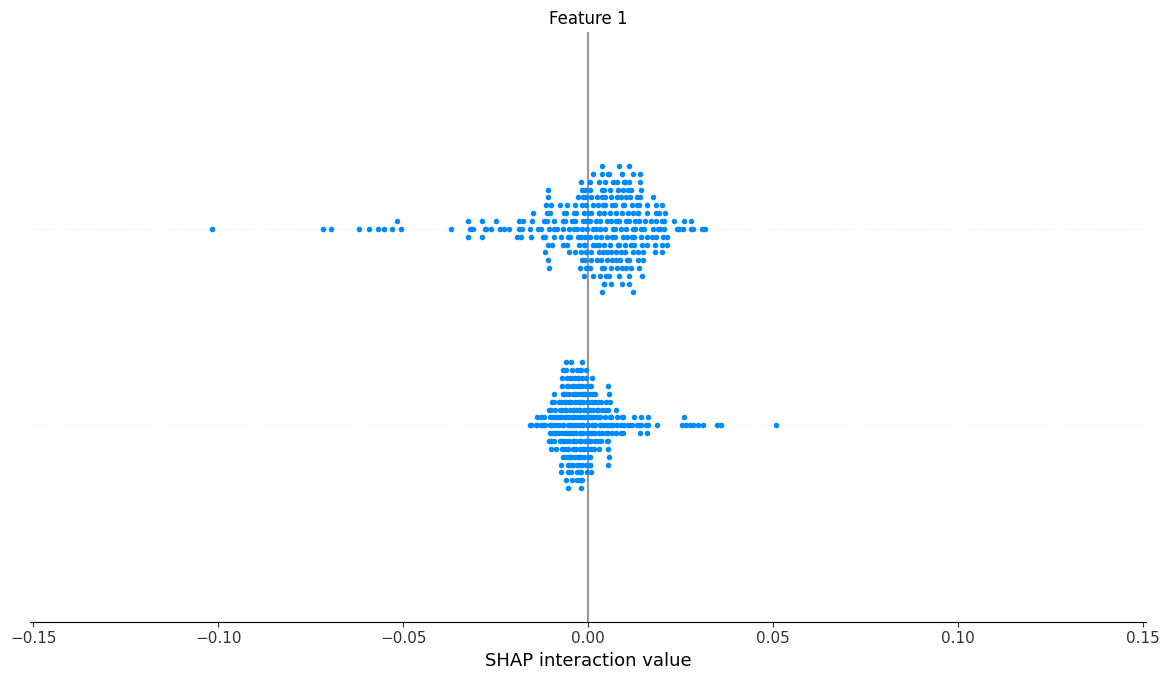

In [61]:
import shap

# Ensure test set is a DataFrame
X_test = pd.DataFrame(X_test, columns=X.columns)

# Tree explainer
explainer = shap.TreeExplainer(rf)

# Get SHAP values (single array for binary classification)
shap_values = explainer.shap_values(X_test)

# Check if it's a list or array
if isinstance(shap_values, list):
    print("Using shap_values[1] for class 1 (Attrition = Yes)")
    shap.summary_plot(shap_values[1], X_test)
else:
    print("Single array detected, plotting directly.")
    shap.summary_plot(shap_values)